In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/test-file/tested.csv
/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
# !ls ../input/titanic/
!find /kaggle -name "titanic"

/kaggle/input/titanic


In [3]:
!ls /kaggle/input/titanic

gender_submission.csv  test.csv  train.csv


In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_sb = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
print("\ntraining_data: ")
print(df.head())
print("\ntesting_data: ")
print(df_test.head())
print("\nsubmission_data: ")
print(df_sb.head())


training_data: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df["flag"] = 0
df_test["flag"] = 1

In [8]:
df_label = df["Survived"]
df_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
dataset = pd.concat([df, df_test], ignore_index = True)

In [10]:
dataset[dataset["flag"]== 1].head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,flag
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [11]:
dataset.shape

(1309, 13)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  flag         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [13]:
for col in dataset.columns:
    if(dataset[col].isnull().sum() > 0):
        if(dataset[col].dtype == "object"):
            dataset[col] = dataset[col].fillna(dataset[col].value_counts().idxmax()).infer_objects(copy = False)
        else:
            dataset[col] = dataset[col].fillna(dataset[col].mean())

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  flag         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [15]:
dataset = dataset.drop(columns = ["PassengerId", "Name", "Survived", "Ticket"])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Cabin     1309 non-null   object 
 7   Embarked  1309 non-null   object 
 8   flag      1309 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [17]:
dataset["Sex"] = dataset["Sex"].map({"male" : 1, "female" : 0})
# dataset.head()

In [18]:
df = dataset[dataset["flag"] == 0].drop(columns = ["flag"])
df_test= dataset[dataset["flag"] == 1].drop(columns = ["flag"])

In [19]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,C23 C25 C27,S
1,1,0,38.0,1,0,71.2833,C85,C
2,3,0,26.0,0,0,7.9250,C23 C25 C27,S
3,1,0,35.0,1,0,53.1000,C123,S
4,3,1,35.0,0,0,8.0500,C23 C25 C27,S


In [20]:
from sklearn.model_selection import train_test_split
x = df
y = df_label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 36)

In [21]:
col = df.select_dtypes(include = ["object"]).columns
from category_encoders import TargetEncoder
encoder= TargetEncoder(cols = col)
x_train = encoder.fit_transform(x_train,y_train)
x_test = encoder.transform(x_test)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
from sklearn.svm import SVC
model = SVC(kernel = "poly", C = 300, gamma = "auto")
model.fit(x_train, y_train)

SVC(C=300, gamma='auto', kernel='poly')

In [24]:
model.score(x_train, y_train)

0.8609550561797753

In [25]:
model.score(x_test, y_test)

0.8379888268156425

In [26]:
y_pred= model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[95 10]
 [19 55]]


In [28]:
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



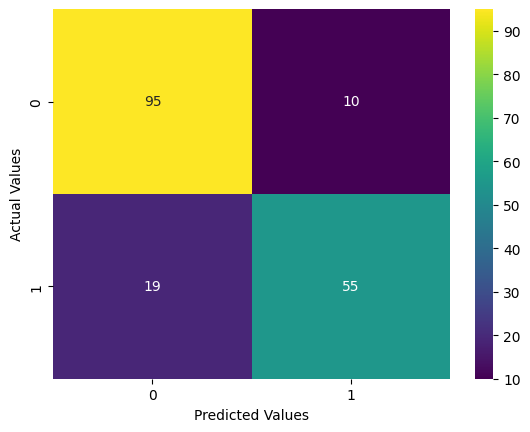

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, annot = True, cmap = "viridis")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [30]:
df_test= dataset[dataset["flag"] == 1].drop(columns = ["flag"])

In [31]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,3,1,34.500000,0,0,7.8292,C23 C25 C27,Q
892,3,0,47.000000,1,0,7.0000,C23 C25 C27,S
893,2,1,62.000000,0,0,9.6875,C23 C25 C27,Q
894,3,1,27.000000,0,0,8.6625,C23 C25 C27,S
895,3,0,22.000000,1,1,12.2875,C23 C25 C27,S
...,...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,8.0500,C23 C25 C27,S
1305,1,0,39.000000,0,0,108.9000,C105,C
1306,3,1,38.500000,0,0,7.2500,C23 C25 C27,S
1307,3,1,29.881138,0,0,8.0500,C23 C25 C27,S


In [32]:
df_test = encoder.transform(df_test)

In [33]:
df_test = scaler.transform(df_test)

In [34]:
y_sub_pred= model.predict(df_test)

In [35]:
y_sub_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [36]:
df_sb

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
submit = pd.DataFrame(
    {
        "PassengerId" : df_sb["PassengerId"],
        "Survived" : y_sub_pred
    }
)

In [38]:
submit.to_csv("submission1.csv", index = False)

In [39]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
